In [13]:
!which python

/Users/ryan/infectious-diseases/bin/python


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [15]:
def sliceEmptyTimepoints(S, I, R, T, last_idx):
    return S[:last_idx+1], I[:last_idx+1], R[:last_idx+1], T[:last_idx+1]

In [16]:
def SIR(S0,I0,R0, beta, gamma, mu_birth, mu_death, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = np.zeros(len(T))
    
    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
            N[idx] = S0+I0+R0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] / N[idx-1] + mu_birth * N[idx-1] - mu_death * S[idx-1]
            dI_dt = beta * S[idx-1] * I[idx-1] / N[idx-1] - gamma * I[idx-1] - mu_death * I[idx-1]
            dR_dt = gamma * I[idx-1] - mu_death * R[idx-1]
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
            N[idx] = S[idx] + I[idx] + R[idx]

            if N[idx] > 1500: 
                last_idx = idx
                break

            
    
    return sliceEmptyTimepoints(S, I, R, T, last_idx)

(0.0, 84.57750000000001)

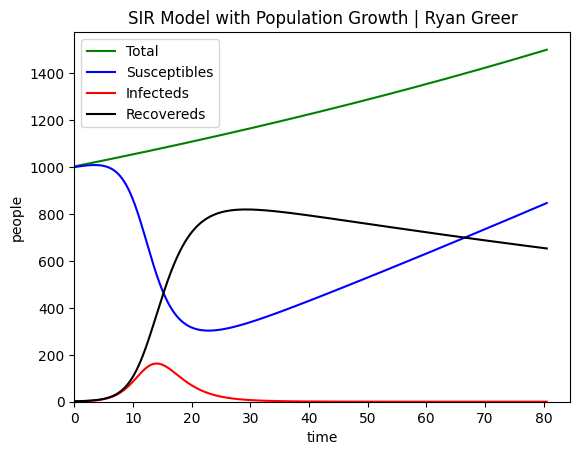

In [17]:
# SIR(S0,I0,R0, beta, gamma, t_max, stepsize):
beta = 1
gamma = 0.5
mu_birth = 0.01
mu_death = mu_birth / 2
R0 = beta / (gamma + mu_death)
S,I,R,T = SIR(S0=1000, I0=1, R0=R0, beta=beta, gamma=gamma, mu_birth=mu_birth, mu_death=mu_death, t_max=100, stepsize=0.05)
fig, ax = plt.subplots()
ax.plot(T,S+I+R, color='g', label='Total')
ax.plot(T,S, color='b', label='Susceptibles')
ax.plot(T,I, color='r', label='Infecteds')
ax.plot(T,R, color='k', label='Recovereds')
ax.set_title('SIR Model with Population Growth | Ryan Greer')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

## Final Epidemic Size Visualizations:

In [30]:
def normalize_fx(R, N):
    normalized = np.zeros(len(R))
    for idx,r in enumerate(R):
        normalized[idx] = R[idx] / N[idx]

    return normalized

In [31]:
def func_gx(R, R0):
    gx_list = np.zeros(len(R))
    for idx,r in enumerate(R):
        gx_list[idx] = 1 - np.exp(-R0 * r)

    return gx_list

In [36]:
def gx_equation(r, R0):
    return r - (1 - np.exp(-R0 * r))

/var/folders/ss/w4r72t4j057bp2m46gq_kjwr0000gn/T/ipykernel_20906/2541009661.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  normalized[idx] = R[idx] / N[idx]
/var/folders/ss/w4r72t4j057bp2m46gq_kjwr0000gn/T/ipykernel_20906/504602251.py:15: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  intersect, = fsolve(gx_equation, 0.5, args=(R0,))


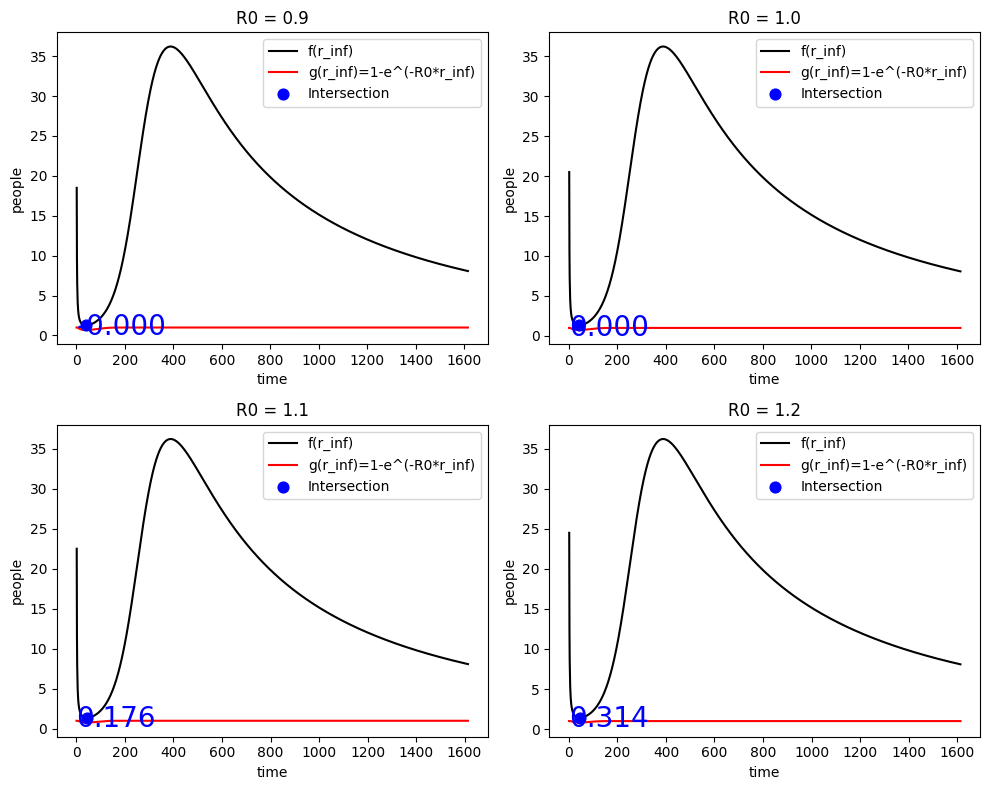

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
R0_list = {0.9, 1.0, 1.1, 1.2}

for ax, R0 in zip(axes.flat, R0_list):
    # SIR(S0,I0,R0, beta, gamma, t_max, stepsize):
    beta = 1
    gamma = 0.5
    mu_birth = 0.01
    mu_death = mu_birth / 2
    S,I,R,T = SIR(S0=1000, I0=1, R0=R0, beta=beta, gamma=gamma, mu_birth=mu_birth, mu_death=mu_death, t_max=100, stepsize=0.05)

    fx = normalize_fx(R, T)
    gx = func_gx(fx, R0)

    intersect, = fsolve(gx_equation, 0.5, args=(R0,))

    ax.plot(fx, 'k-', label="f(r_inf)")
    ax.plot(gx, 'r-', label="g(r_inf)=1-e^(-R0*r_inf)")

    idx = (np.abs(fx - intersect)).argmin()
    ax.scatter(idx, fx[idx], color='blue', s=60, zorder=5, label="Intersection")

    ax.text(intersect + 0.02, intersect, f"{intersect:.3f}", color='blue', fontsize=20)

    ax.set_title(f"R0 = {R0}")
    ax.set_xlabel("time")
    ax.set_ylabel("people")
    ax.legend()

plt.tight_layout()

## Final Plot with Comparison

/var/folders/ss/w4r72t4j057bp2m46gq_kjwr0000gn/T/ipykernel_20906/2541009661.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  normalized[idx] = R[idx] / N[idx]


(0.0, 100.0)

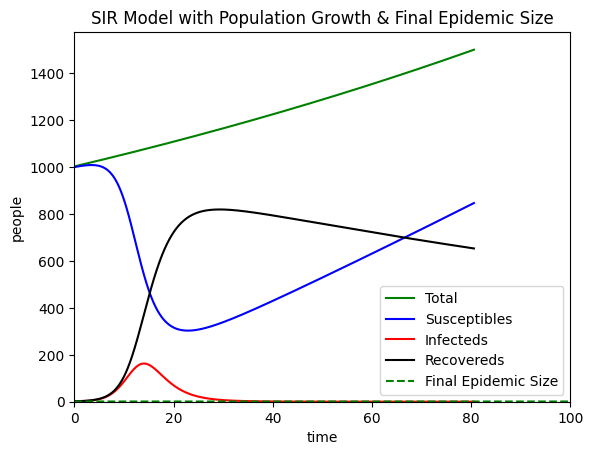

In [50]:

beta = 1
gamma = 0.5
mu_birth = 0.01
mu_death = mu_birth / 2
R0 = beta / (gamma + mu_death)
S,I,R,T = SIR(S0=1000, I0=1, R0=R0, beta=beta, gamma=gamma, mu_birth=mu_birth, mu_death=mu_death, t_max=100, stepsize=0.05)
fx = normalize_fx(R, T)
gx = func_gx(fx, R0)
fig, ax = plt.subplots()
ax.plot(T,S+I+R, color='g', label='Total')
ax.plot(T,S, color='b', label='Susceptibles')
ax.plot(T,I, color='r', label='Infecteds')
ax.plot(T,R, color='k', label='Recovereds')
ax.plot(gx, 'g--', label="Final Epidemic Size")
ax.set_title('SIR Model with Population Growth & Final Epidemic Size')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(0, 100)